### Influence and Deinfluence Analysis on Greedy Algorithm

This Jupyter Notebook analyzes the influence and deinfluence in a network using a greedy algorithm. The workflow includes generating a random graph, running an influence cascade, evaluating the influence and deinfluence, and plotting the results.

In [1]:
import sys
import os
import random
import networkx as nx

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
model_code_dir = os.path.join(parent_dir, 'src')
if model_code_dir not in sys.path:
    sys.path.append(model_code_dir)

import exp_env as env
import copy

In [2]:
# Example usage: generate a random graph
# You can also import other networks from networkx or create your own

graph_type = "erdos_renyi_graph"
num_nodes = 300
influencers_cascade_steps = 3
num_influencers = 30
k_deinfluencers_ls = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]  # Different values of k to test
general_cascade_steps = 3
num_avg_runs = 4

G = nx.gnm_random_graph(num_nodes, 600)

# Create an empty directed graph
G_er_directed = nx.DiGraph()

# Add nodes to the directed graph
G_er_directed.add_nodes_from(G.nodes())

# Add directed edges by randomly assigning directions
for u, v in G.edges():
    if random.choice([True, False]):
        G_er_directed.add_edge(u, v)
    else:
        G_er_directed.add_edge(v, u)

In [3]:
# Set up and run the influence cascade

model = env.run_influence_cascade(G_er_directed, num_influencers=num_influencers, steps=influencers_cascade_steps, selection_method='random')
num_edges = G_er_directed.number_of_edges()

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 122
Number of deinfluenced nodes: 0
Number of susceptible nodes: 178
influencer {5, 10, 142, 271, 277, 152, 155, 284, 288, 289, 291, 36, 299, 50, 182, 57, 192, 198, 203, 77, 87, 92, 93, 98, 99, 234, 240, 241, 113, 246}


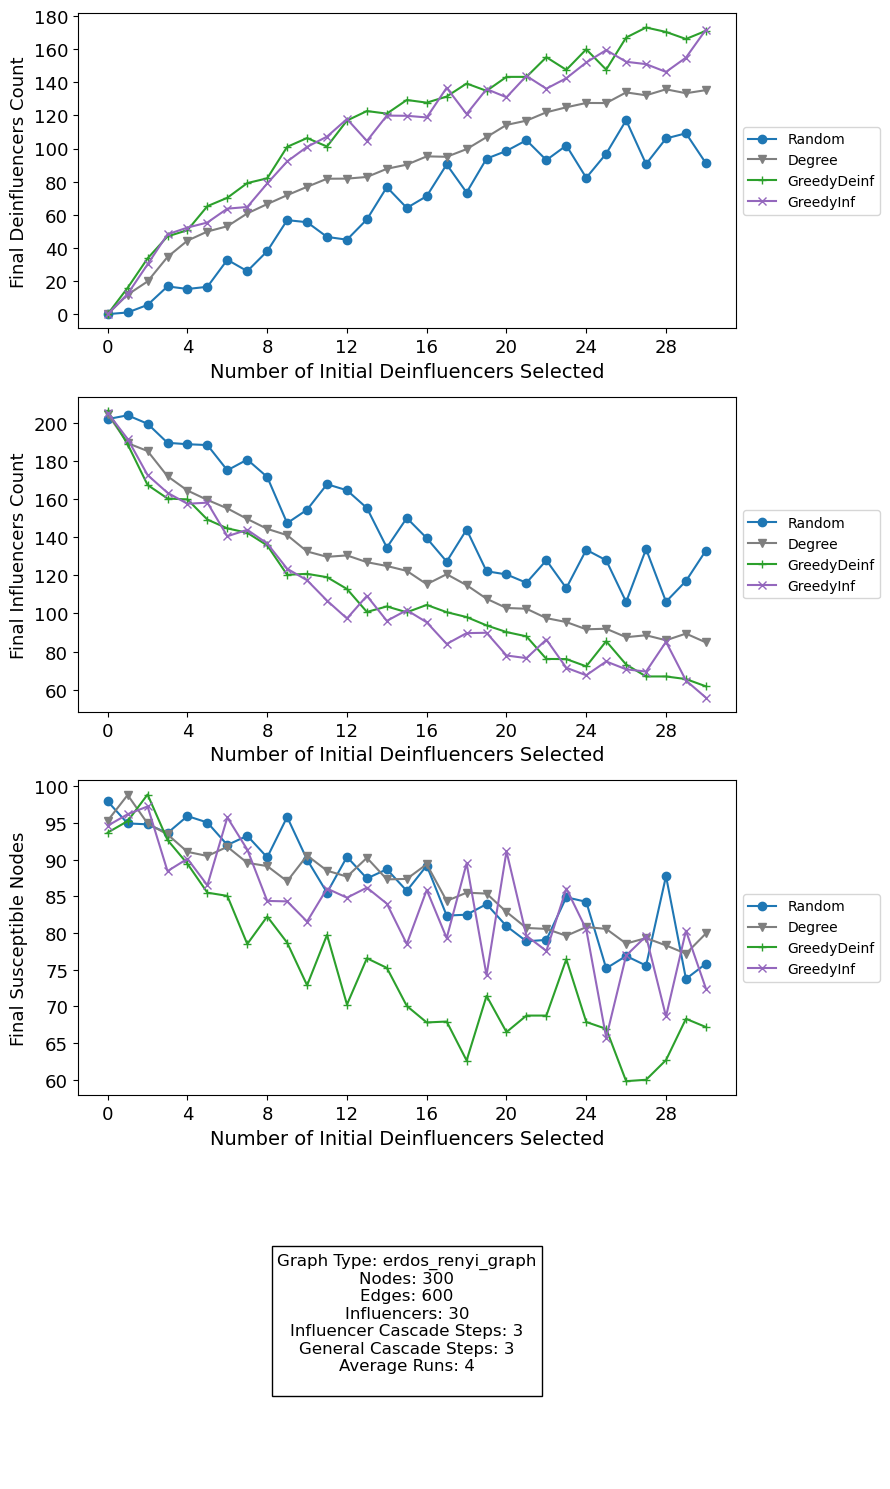

In [4]:
# Evaluate the influence and deinfluence
deinfluencers_list = env.select_deinfluencers_greedy(k_deinfluencers_ls, model_fixed_influencers)
results = env.average_results(deinfluencers_list, model_fixed_influencers, num_runs=num_avg_runs, steps=general_cascade_steps)
env.plot_deinfluencer_results_new(results, G_er_directed, graph_type, num_nodes, num_edges, num_influencers, influencers_cascade_steps, general_cascade_steps, num_avg_runs)